In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [2]:
df = pd.read_csv('dataset_space_API_past_launches_raw.csv')

In [3]:
Date_count = df['Date'].value_counts().to_frame()
BoosterVersion_count = df['BoosterVersion'].value_counts().to_frame()
PayloadMass_count = df['PayloadMass'].value_counts().to_frame()
Orbit_count = df['Orbit'].value_counts().to_frame()
LaunchSite_count = df['LaunchSite'].value_counts().to_frame()
Outcome_count = df['Outcome'].value_counts().to_frame()
Flights_count = df['Flights'].value_counts().to_frame()
GridFins_count = df['GridFins'].value_counts().to_frame()
Reused_count = df['Reused'].value_counts().to_frame()
Legs_count = df['Legs'].value_counts().to_frame()
LandingPad_count = df['LandingPad'].value_counts().to_frame()
Block_count = df['Block'].value_counts().to_frame()
ReusedCount_count = df['ReusedCount'].value_counts().to_frame()
Serial_count = df['Serial'].value_counts().to_frame()
Longitude_count = df['Longitude'].value_counts().to_frame()
Latitude_count = df['Latitude'].value_counts().to_frame()

### Dealling with missing values

In [4]:
df_droped = df.dropna()
df_droped = df_droped.reset_index(drop=True)
df_droped.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,19,2015/1/10,Falcon 9,2395.0,ISS,CCSFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012,-80.577366,28.561857
1,22,2015/4/14,Falcon 9,1898.0,ISS,CCSFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015,-80.577366,28.561857
2,24,2015/6/28,Falcon 9,2477.0,ISS,CCSFS SLC 40,None ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018,-80.577366,28.561857
3,25,2015/12/22,Falcon 9,2034.0,LEO,CCSFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857
4,26,2016/1/17,Falcon 9,553.0,PO,VAFB SLC 4E,False ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,1.0,0,B1017,-120.610829,34.632093


### Classify landing outcome as successful or unsuccessful by creating a landing outcome label from Outcome column, “1” for successful landing, “0” for the unsuccessful landing.

In [5]:
# encode the Outcome column
df_label = df_droped.replace(['True Ocean','True RTLS', 'True ASDS', 
                         'False Ocean', 'False RTLS', 'False ASDS', 'None ASDS','None None',
                         'True','False'],
                        [1,1,1,
                         0,0,0,0,0,
                         1,0])

In [6]:
df_label.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,19,2015/1/10,Falcon 9,2395.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012,-80.577366,28.561857
1,22,2015/4/14,Falcon 9,1898.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015,-80.577366,28.561857
2,24,2015/6/28,Falcon 9,2477.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018,-80.577366,28.561857
3,25,2015/12/22,Falcon 9,2034.0,LEO,CCSFS SLC 40,1,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857
4,26,2016/1/17,Falcon 9,553.0,PO,VAFB SLC 4E,0,1,True,False,True,5e9e3033383ecbb9e534e7cc,1.0,0,B1017,-120.610829,34.632093


# Step 3 EDA

In [7]:
# !pip install -q pywaffle
from pywaffle import Waffle

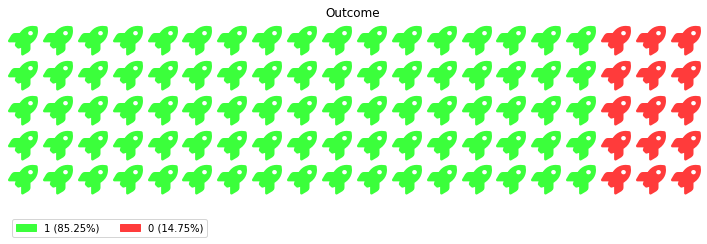

In [8]:
plt.rcParams['figure.figsize'] = (10,10)
data = dict(df_label['Outcome'].value_counts(normalize = True) * 100)
fig = plt.figure(
    FigureClass=Waffle, 
    columns=20, 
    values=data, 
    colors=("#3bff3b", "#ff3b3b"),
    title={'label': 'Outcome', 'loc': 'center'},
    icons = 'rocket',
    icon_size = 30,
    labels=[f"{k} ({v:.2f}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.3), 'ncol': len(data)}
)
plt.show()

In [9]:
df_label.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,19,2015/1/10,Falcon 9,2395.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012,-80.577366,28.561857
1,22,2015/4/14,Falcon 9,1898.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015,-80.577366,28.561857
2,24,2015/6/28,Falcon 9,2477.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018,-80.577366,28.561857
3,25,2015/12/22,Falcon 9,2034.0,LEO,CCSFS SLC 40,1,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857
4,26,2016/1/17,Falcon 9,553.0,PO,VAFB SLC 4E,0,1,True,False,True,5e9e3033383ecbb9e534e7cc,1.0,0,B1017,-120.610829,34.632093


### LaunchSite vs. Date with Outcome

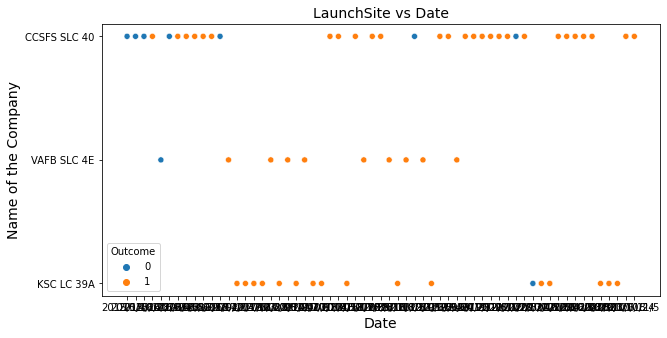

In [10]:
plt.figure(figsize = (10,5))
sns.scatterplot(x="Date", 
                y="LaunchSite", 
                hue="Outcome",
                data=df_label)
plt.title("LaunchSite vs Date",fontsize=14)
plt.xticks(rotation = 0)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Name of the Company",fontsize=14)
plt.show()

### Number of missions per Launch Site

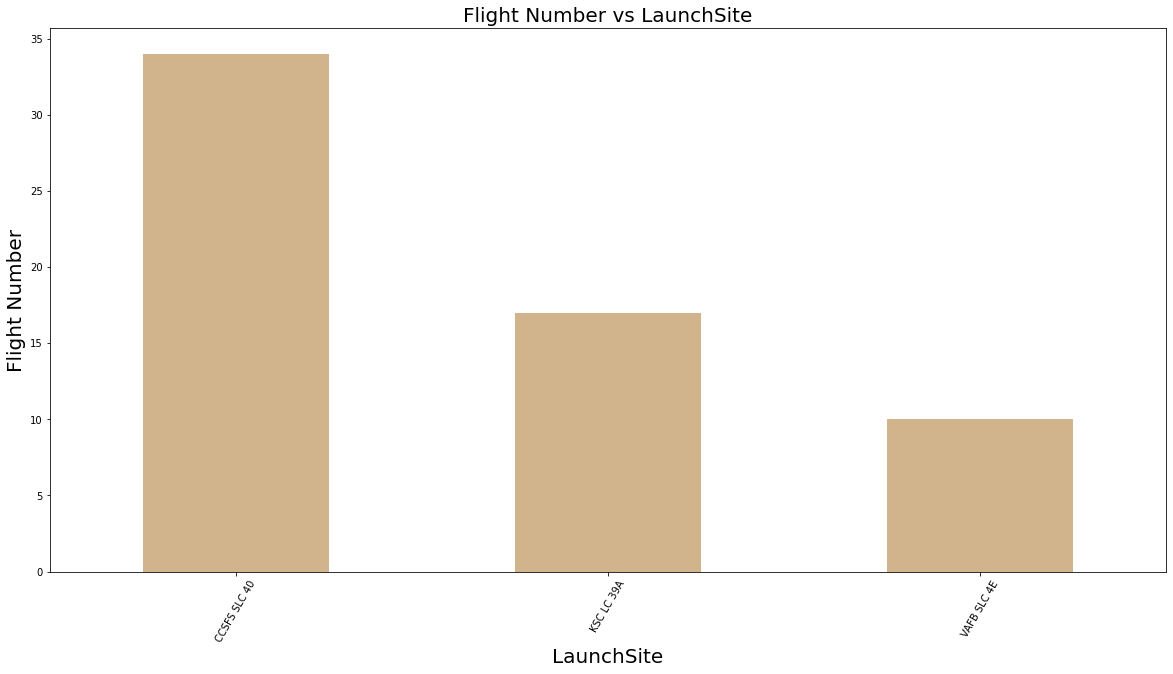

In [11]:
plt.figure(figsize = (20, 10))
df_label.groupby('LaunchSite').count()['FlightNumber'].plot(kind='bar',color='tan')
plt.xticks(rotation=60)
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("Flight Number",fontsize=20)
plt.title("Flight Number vs LaunchSite",fontsize=20)

plt.show()

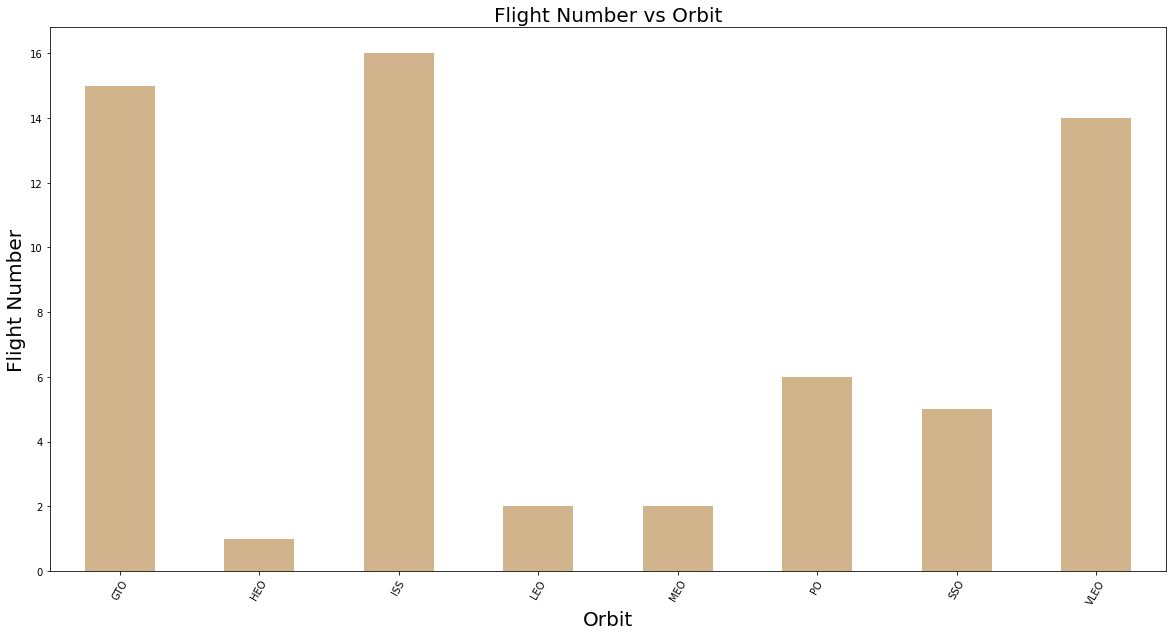

In [12]:
plt.figure(figsize = (20, 10))
df_label.groupby('Orbit').count()['FlightNumber'].plot(kind='bar',color='tan')
plt.xticks(rotation=60)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Flight Number",fontsize=20)
plt.title("Flight Number vs Orbit",fontsize=20)

plt.show()

### Success Rate vs. Launch Site

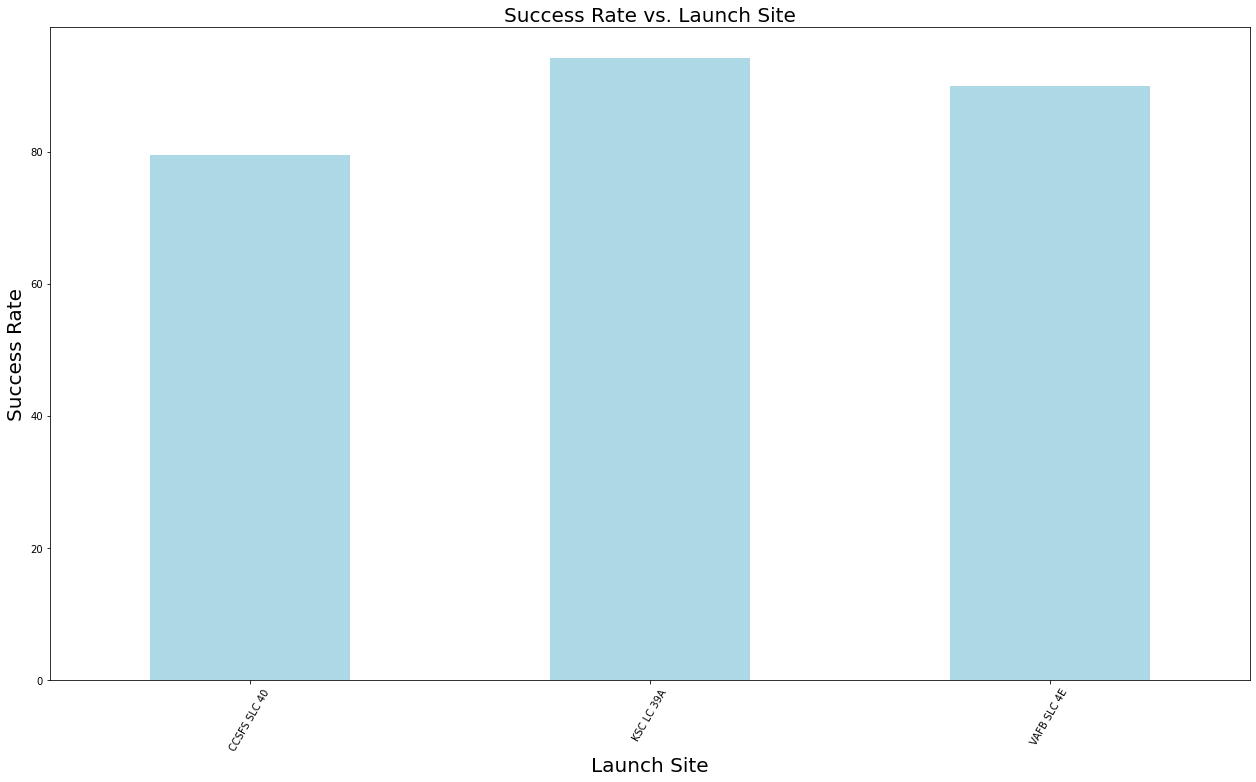

In [13]:
df_label['Success'] = df_label['Outcome']==1
df_label['Success Rate %']=df_label['Success']*100

plt.figure(figsize = (21.5,12))
df_label.groupby('LaunchSite').mean()['Success Rate %'].plot(kind='bar',color='lightblue')
plt.xticks(rotation=60)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.title("Success Rate vs. Launch Site",fontsize=20)

plt.show()

In [14]:
df_label.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Success,Success Rate %
0,19,2015/1/10,Falcon 9,2395.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012,-80.577366,28.561857,False,0
1,22,2015/4/14,Falcon 9,1898.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015,-80.577366,28.561857,False,0
2,24,2015/6/28,Falcon 9,2477.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018,-80.577366,28.561857,False,0
3,25,2015/12/22,Falcon 9,2034.0,LEO,CCSFS SLC 40,1,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857,True,100
4,26,2016/1/17,Falcon 9,553.0,PO,VAFB SLC 4E,0,1,True,False,True,5e9e3033383ecbb9e534e7cc,1.0,0,B1017,-120.610829,34.632093,False,0


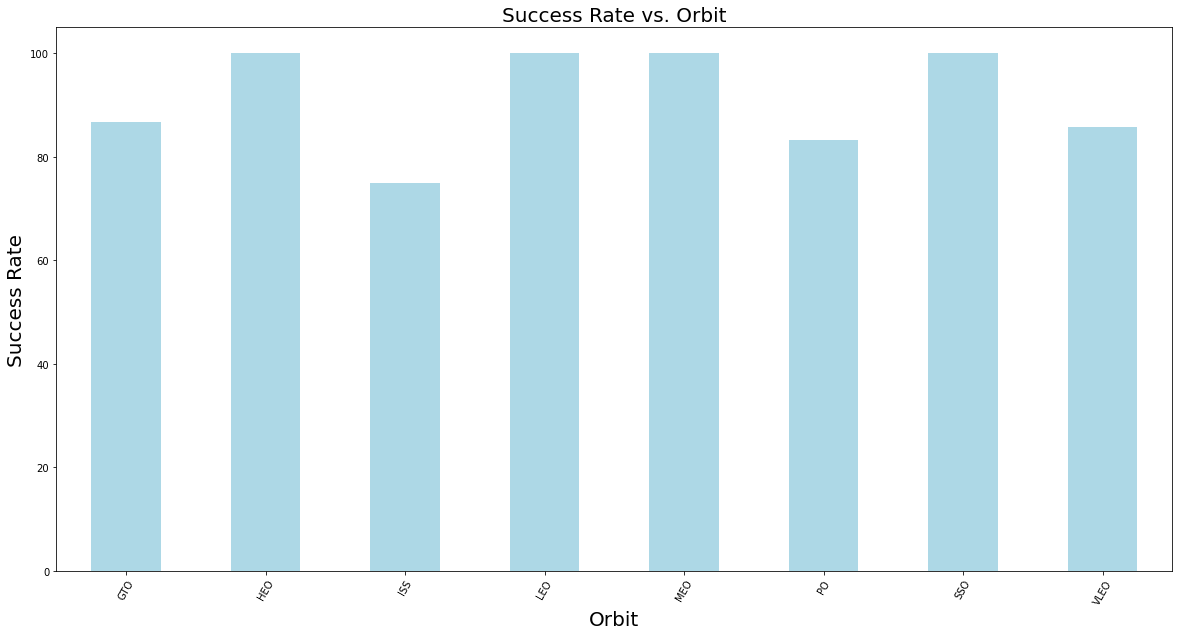

In [15]:
df_label['Success'] = df_label['Outcome']==1
df_label['Success Rate %']=df_label['Success']*100

plt.figure(figsize = (20,10))
df_label.groupby('Orbit').mean()['Success Rate %'].plot(kind='bar',color='lightblue')
plt.xticks(rotation=60)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.title("Success Rate vs. Orbit",fontsize=20)

plt.show()

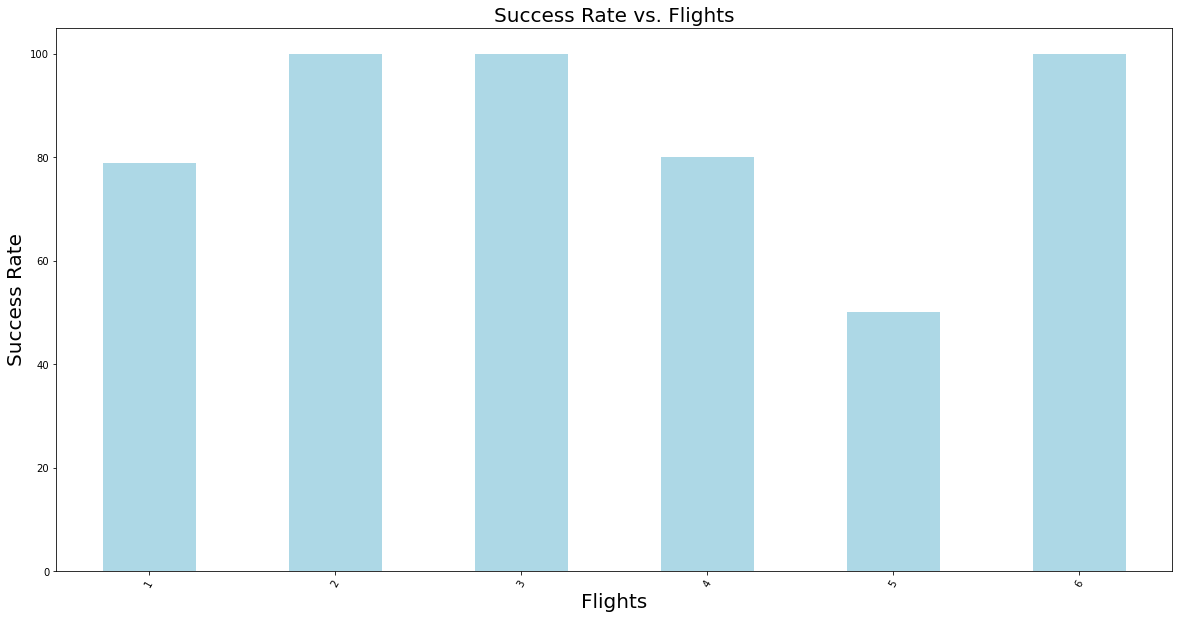

In [16]:
df_label['Success'] = df_label['Outcome']==1
df_label['Success Rate %']=df_label['Success']*100

plt.figure(figsize = (20,10))
df_label.groupby('Flights').mean()['Success Rate %'].plot(kind='bar',color='lightblue')
plt.xticks(rotation=60)
plt.xlabel("Flights",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.title("Success Rate vs. Flights",fontsize=20)

plt.show()

### PayloadMass vs. LaunchSite

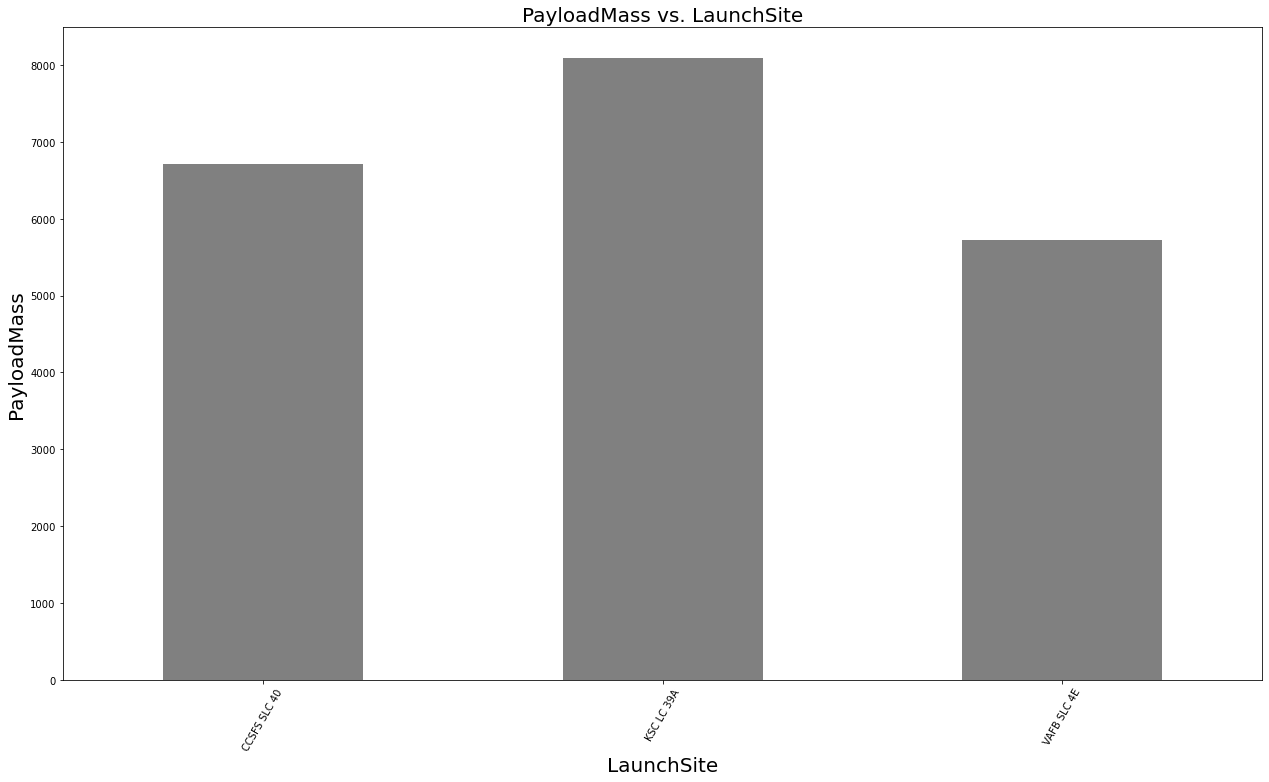

In [17]:
plt.figure(figsize = (21.5,12))
df_label.groupby('LaunchSite').mean()['PayloadMass'].plot(kind='bar',color='grey')
plt.xticks(rotation=60)
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.title("PayloadMass vs. LaunchSite",fontsize=20)

plt.show()

In [18]:
### PayloadMass vs. Orbit

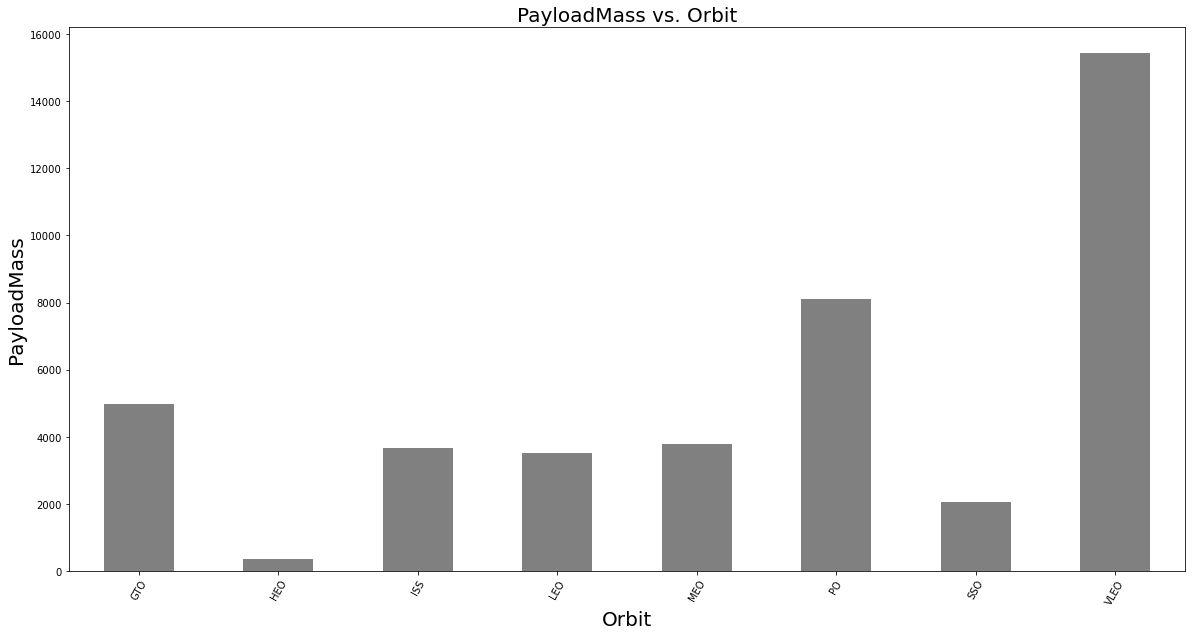

In [19]:
plt.figure(figsize = (20,10))
df_label.groupby('Orbit').mean()['PayloadMass'].plot(kind='bar',color='grey')
plt.xticks(rotation=60)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.title("PayloadMass vs. Orbit",fontsize=20)

plt.show()

In [20]:
df_label.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Success,Success Rate %
0,19,2015/1/10,Falcon 9,2395.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012,-80.577366,28.561857,False,0
1,22,2015/4/14,Falcon 9,1898.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015,-80.577366,28.561857,False,0
2,24,2015/6/28,Falcon 9,2477.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018,-80.577366,28.561857,False,0
3,25,2015/12/22,Falcon 9,2034.0,LEO,CCSFS SLC 40,1,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857,True,100
4,26,2016/1/17,Falcon 9,553.0,PO,VAFB SLC 4E,0,1,True,False,True,5e9e3033383ecbb9e534e7cc,1.0,0,B1017,-120.610829,34.632093,False,0


### PayloadMass vs. Flights

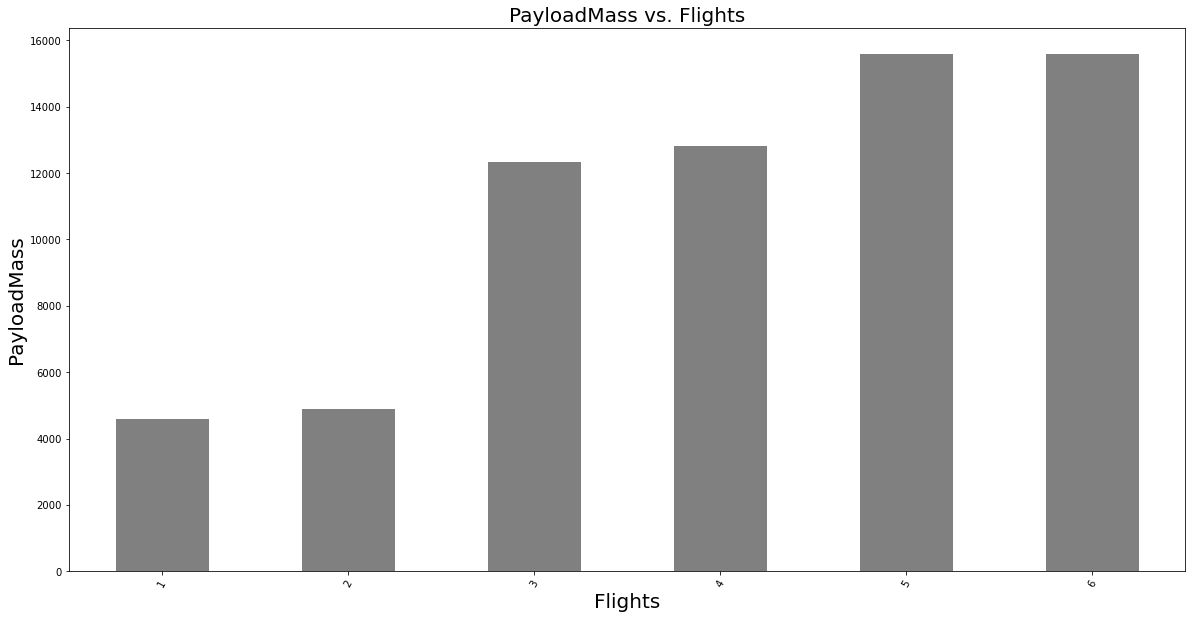

In [21]:
plt.figure(figsize = (20,10))
df_label.groupby('Flights').mean()['PayloadMass'].plot(kind='bar',color='grey')
plt.xticks(rotation=60)
plt.xlabel("Flights",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.title("PayloadMass vs. Flights",fontsize=20)

plt.show()

In [22]:
import folium

In [23]:
LaunchSite_count

,LaunchSite
CCSFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13
Kwajalein Atoll,4


### Success Rate in CCSFS SLC 40

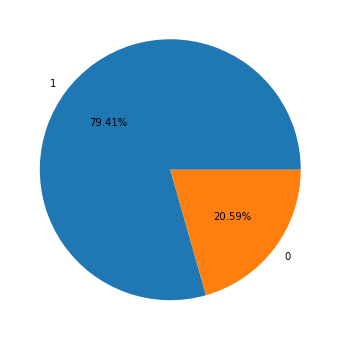

In [24]:
CCSFS = df_label.loc[df_label['LaunchSite']=='CCSFS SLC 40']
Outcome_CCSFS = CCSFS['Outcome'].value_counts().to_frame()

plt.figure(figsize = (6,6))
plt.pie(Outcome_CCSFS['Outcome'], 
        labels = list(Outcome_CCSFS.index), 
        autopct = '%.2f%%' )
plt.show()

### Success Rate in KSC LC 39A

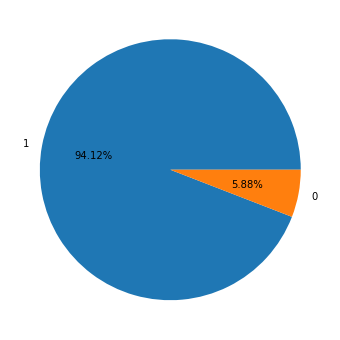

In [25]:
KSC = df_label.loc[df_label['LaunchSite']=='KSC LC 39A']
Outcome_KSC = KSC['Outcome'].value_counts().to_frame()

plt.figure(figsize = (6,6))
plt.pie(Outcome_KSC['Outcome'], 
        labels = list(Outcome_KSC.index), 
        autopct = '%.2f%%' )
plt.show()

### Success Rate in VAFB SLC 4E

([<matplotlib.patches.Wedge at 0x7fb75962aa90>,
 [Text(-1.0461621424642782, 0.33991877217145816, '1'),
  Text(1.0461621185951564, -0.3399188456330337, '0')],
 [Text(-0.5706338958896062, 0.18541023936624987, '90.00%'),
  Text(0.5706338828700852, -0.18541027943620017, '10.00%')])

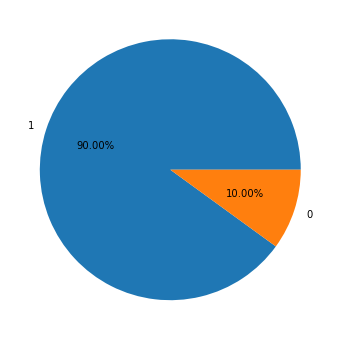

In [26]:
VAFB = df_label.loc[df_label['LaunchSite']=='VAFB SLC 4E']
Outcome_VAFB = VAFB['Outcome'].value_counts().to_frame()

plt.figure(figsize = (6,6))
plt.pie(Outcome_VAFB['Outcome'], 
        labels = list(Outcome_VAFB.index), 
        autopct = '%.2f%%' )
# plt.show()

